In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle

In [3]:
import nltk
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
STOPWORDS= set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshrajsahu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
ds=pd.read_csv("/Users/harshrajsahu/Amazon_Sentiment_Analysis/Data/amazon_alexa 2.tsv" ,delimiter='\t',quoting=3)
print(f"Dataset Shape:{ds.shape}")

Dataset Shape:(3150, 5)


In [9]:
ds.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
ds.columns.values

array(['rating', 'date', 'variation', 'verified_reviews', 'feedback'],
      dtype=object)

In [11]:
ds.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [12]:
ds[ds['verified_reviews'].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [13]:
ds.dropna(inplace=True)

In [14]:
ds.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [15]:
ds.shape

(3149, 5)

In [16]:
ds['length']=ds['verified_reviews'].apply(len)

In [17]:
ds.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [18]:
ds.dtypes


rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

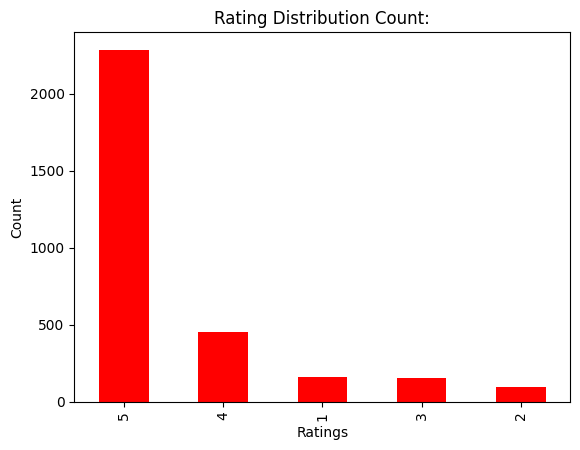

In [19]:
ds['rating'].value_counts().plot.bar(color='red')
plt.title("Rating Distribution Count:")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='rating', ylabel='count'>

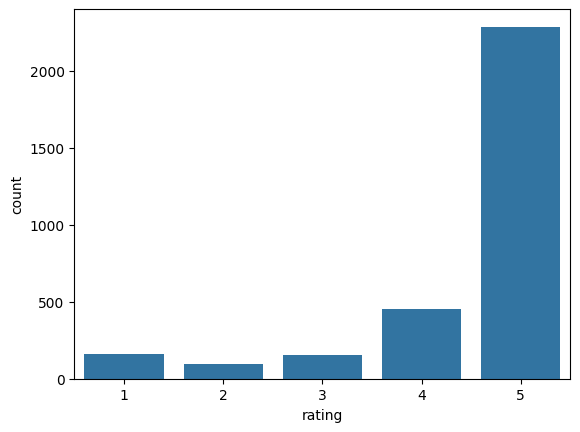

In [20]:
sns.countplot(x="rating",data=ds)

In [21]:
ds["rating"].value_counts(normalize=True)

rating
5    0.725945
4    0.144490
1    0.051127
3    0.048269
2    0.030168
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

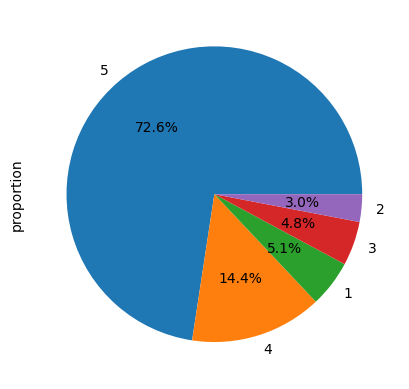

In [22]:
ds['rating'].value_counts(normalize=True).plot(kind='pie',autopct="%1.1f%%")

In [23]:
ds.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback',
       'length'],
      dtype='object')

In [24]:
len(ds)

3149

In [25]:
ds['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

<Axes: xlabel='feedback', ylabel='count'>

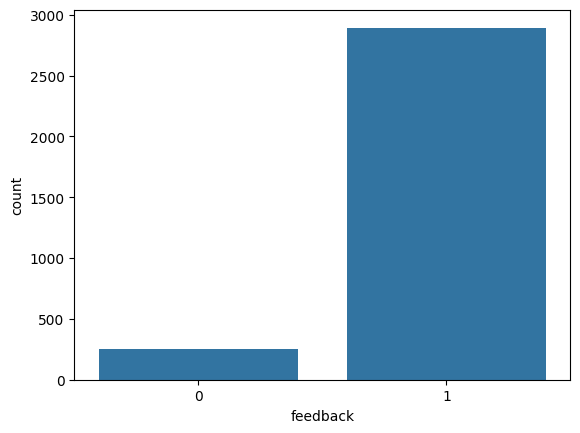

In [26]:
sns.countplot(x="feedback",data=ds)

In [27]:
ds['feedback'].value_counts(normalize=True)

feedback
1    0.918704
0    0.081296
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

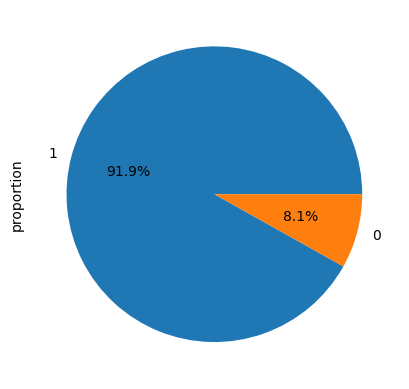

In [28]:
ds['feedback'].value_counts(normalize=True).plot(kind='pie', autopct="%1.1f%%")

In [29]:
ds.groupby('feedback')['rating'].value_counts()

feedback  rating
0         1          161
          2           95
1         5         2286
          4          455
          3          152
Name: count, dtype: int64

In [30]:
#Variation

In [31]:
ds['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

In [32]:
ds['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

<Axes: xlabel='variation'>

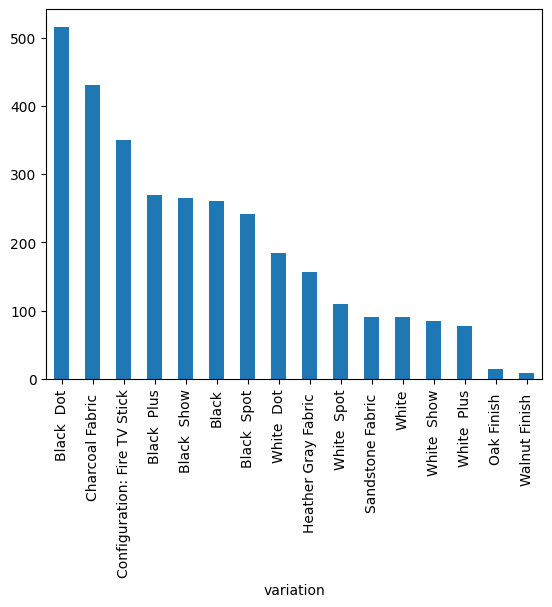

In [33]:

ds['variation'].value_counts().plot(kind='bar')


<Axes: ylabel='proportion'>

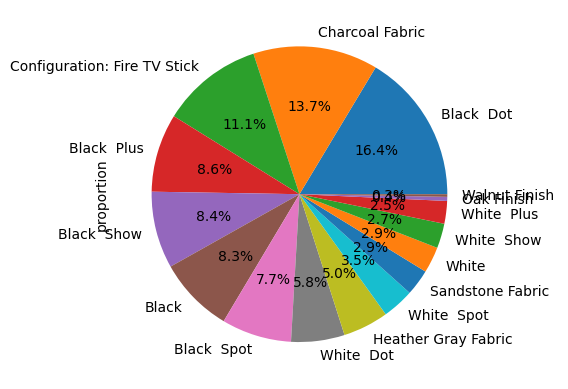

In [34]:
ds['variation'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

In [35]:
ds.groupby('variation')[['rating','feedback','length']].mean().sort_values(by='rating' ,ascending=False)

,rating,feedback,length
variation,,,
Walnut Finish,4.888889,1.000000,138.333333
Oak Finish,4.857143,1.000000,104.571429
Charcoal Fabric,4.730233,0.972093,119.662791
Heather Gray Fabric,4.694268,0.987261,117.859873
Configuration: Fire TV Stick,4.591429,0.920000,86.965714
Black Show,4.490566,0.932075,146.875472
Black Dot,4.453488,0.930233,114.544574
White Dot,4.423913,0.934783,95.391304
Black Plus,4.370370,0.896296,186.485185


<Axes: xlabel='variation'>

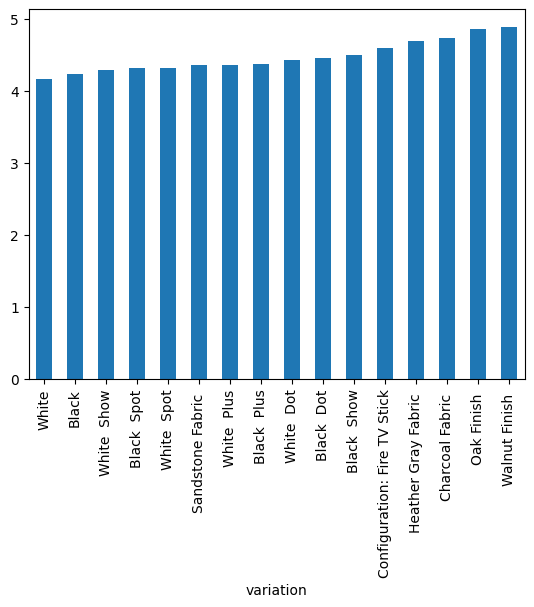

In [36]:
ds.groupby('variation')['rating'].mean().sort_values().plot(kind='bar')


In [37]:
ds["length"].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

<Axes: xlabel='length', ylabel='Count'>

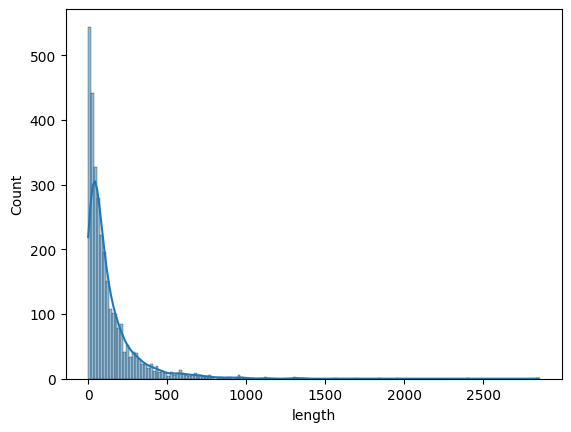

In [38]:
sns.histplot(data=ds, x="length",kde=True)

<Axes: xlabel='length', ylabel='Count'>

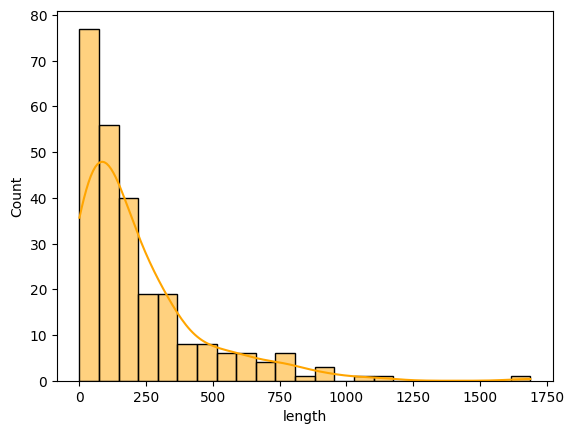

In [39]:
sns.histplot(ds[ds['feedback']==0]['length'], kde=True, color='orange')

<Axes: xlabel='length', ylabel='Count'>

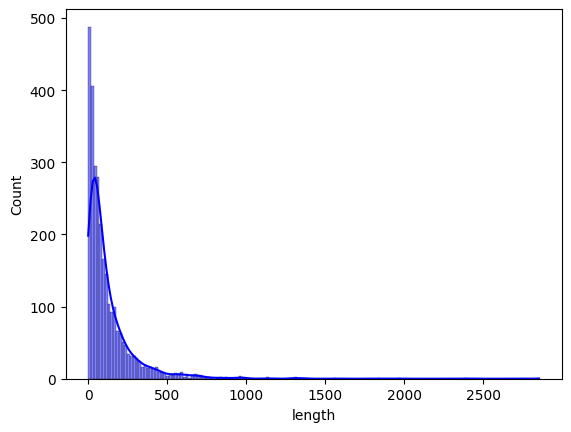

In [40]:
sns.histplot(ds[ds['feedback']==1]['length'], kde=True, color='blue')

In [41]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(ds['verified_reviews'])

In [42]:
review_string = " ".join(ds['verified_reviews'])

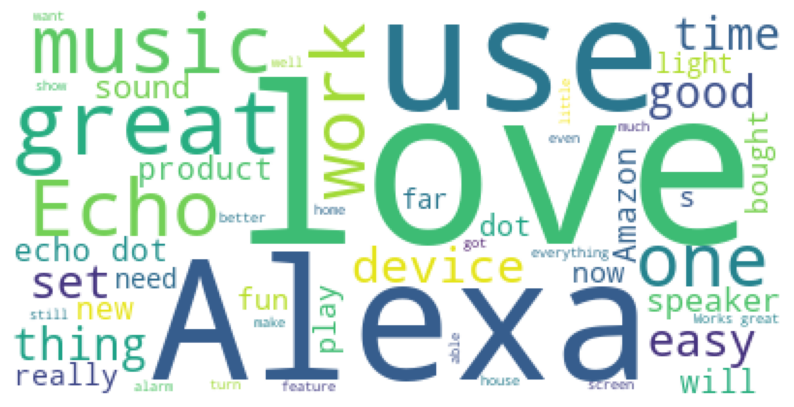

In [43]:
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(review_string))
plt.axis('off')
plt.show()

In [44]:
positive_review = " ".join(ds[ds['feedback']==1]['verified_reviews'])
negative_review = " ".join(ds[ds['feedback']==0]['verified_reviews'])

#split the string into list of words
neg_reviews= negative_review.lower().split()
pos_reviews= positive_review.lower().split()

In [45]:
un_neg = [x for x in neg_reviews if x not in pos_reviews]
un_neg = " ".join(un_neg)

un_pos = [x for x in pos_reviews if x not in neg_reviews]
un_pos = " ".join(un_pos)

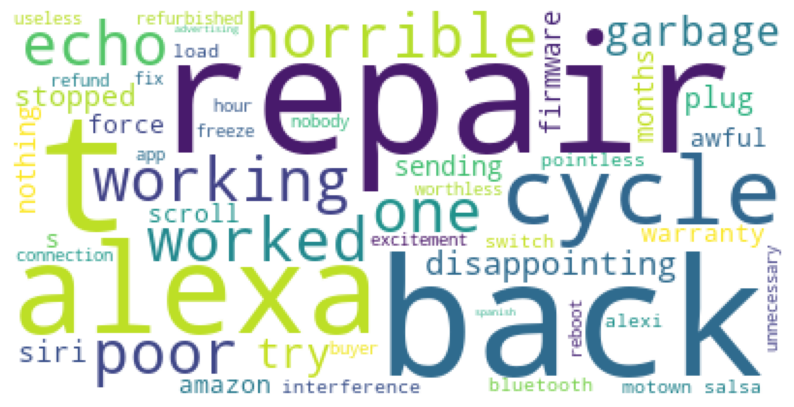

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(un_neg))
plt.axis('off')
plt.show()

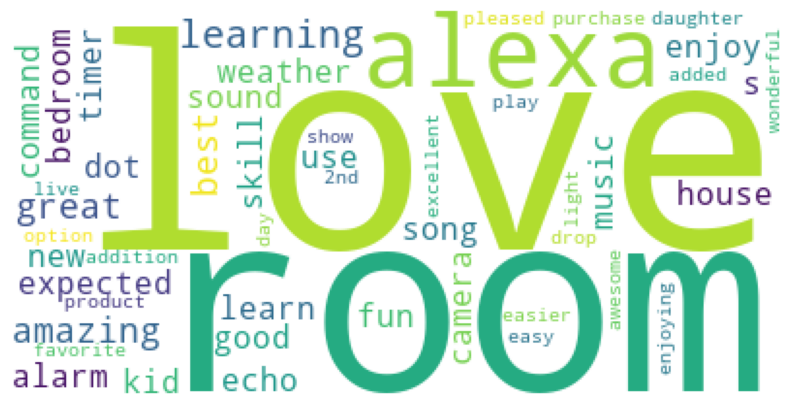

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(un_pos))
plt.axis('off')
plt.show()

In [48]:
# Data Preprocessing & Modeling

In [49]:
corpus=[]
stemmer = PorterStemmer()
for i in range(0,ds.shape[0]):
    review = re.sub('[^a-zA-Z]',' ', ds.iloc[i]['verified_reviews'])
    review= review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
    review=' '.join(review)
    corpus.append(review)

In [50]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()
y = ds['feedback'].values

In [51]:
pickle.dump(cv,open('countVectorizer.pkl','wb'))

In [52]:
X.shape

(3149, 2500)

In [53]:
y.shape

(3149,)

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=0)

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc=scaler.fit_transform(X_test)

In [56]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [57]:
rfc=RandomForestClassifier()
rfc.fit(X_train_sc,y_train)

RandomForestClassifier()

In [58]:
print("training accuracy: ", rfc.score(X_train_sc, y_train))
print("testing accuracy: ", rfc.score(X_test_sc, y_test))

training accuracy:  0.9952305246422893
testing accuracy:  0.9230158730158731


In [59]:
pred1= rfc.predict(X_test_sc)
pred1

array([1, 1, 1, ..., 1, 1, 1])

In [60]:
cm = confusion_matrix(y_test,pred1)
cm

array([[  16,  192],
       [   2, 2310]])

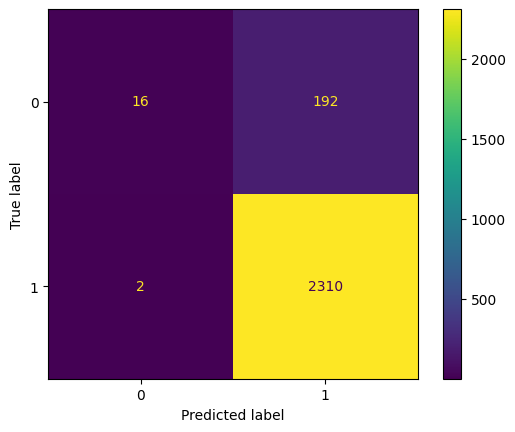

In [61]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
cm_display.plot()
plt.show()

In [62]:
#XGBOOST

In [63]:
xgb = XGBClassifier()
xgb.fit(X_train_sc,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [64]:
print(f"training accuracy: {xgb.score(X_train_sc, y_train)}")
print(f"testing accuracy: {xgb.score(X_test_sc, y_test)}")

training accuracy: 0.9793322734499205
testing accuracy: 0.9111111111111111


In [65]:
pred2= xgb.predict(X_test)
pred2

array([1, 1, 1, ..., 1, 1, 1])

In [66]:
cm= confusion_matrix(y_test, pred2)
cm

array([[   0,  208],
       [   3, 2309]])

In [67]:
#Decision Tree

In [68]:
dt=DecisionTreeClassifier()
dt.fit(X_train_sc,y_train)

DecisionTreeClassifier()

In [69]:
print(f"training accuracy: {dt.score(X_train_sc, y_train)}")
print(f"testing accuracy: {dt.score(X_test_sc, y_test)}")

training accuracy: 0.9952305246422893
testing accuracy: 0.9099206349206349


In [70]:
pred3= dt.predict(X_test)
cm= confusion_matrix(y_test, pred3)
cm

array([[   0,  208],
       [   0, 2312]])

In [72]:
pickle.dump(xgb, open('Models/model_xgb.pkl', 'wb'))